In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib
import numpy
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
import matplotlib.dates as mdates
from get_prediction_data import *
from making_7day_predictions import *
from datetime import datetime
from datetime import timedelta
% matplotlib inline

In [135]:
matplotlib.__version__

'2.1.0'

In [86]:
from model_fitting import *

In [87]:
X_train, X_test, y_train, y_test = get_X_y_for_hr('hr')

In [89]:
# fitting a gradient booster model
n_estimators = 60000
params = {'n_estimators': n_estimators, 'max_depth': 3, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr_2 = GradientBoostingRegressor(**params)
gbr_2.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=60000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [91]:
yhat = gbr_2.predict(X_test)

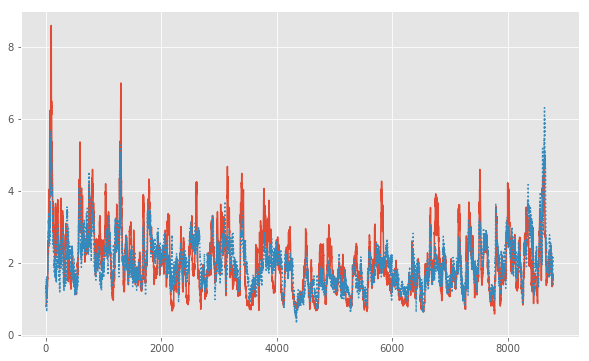

In [92]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(y_test)
ax.plot(yhat,':')

In [6]:
buoyID = 46026
get_prediction_data(buoyID)
print('Getting Prediction Data from {}'.format(buoyID))
prediction_df_neashore = clean_prediction_data('../data/data_for_prediction_{}.csv'.format(buoyID))

Getting Prediction Data from 46026


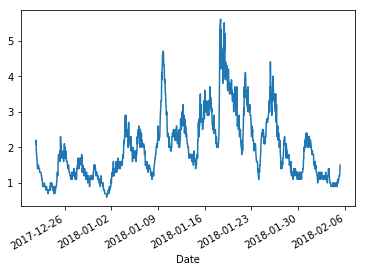

In [7]:
prediction_df_neashore['WVHT'].plot()

In [10]:
m1 = unpickle_model('gbr_hr.pkl')

In [11]:
buoyID = 46059
get_prediction_data(buoyID)
prediction_df = clean_prediction_data('../data/data_for_prediction_{}.csv'.format(buoyID))
prediction_df = adding_speed_col(prediction_df, 650)
prediction_df = add_time_delta(prediction_df)
prediction_df = add_time_y(prediction_df)
prediction_df = round_time_y(prediction_df)
prediction_df.to_csv('../data/prediction_df.csv')
prediction_df['ID'] = 46059

cols_to_keep = ['YY', 'MM', 'DD', 'hh', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD',
                'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP','ID','t_arrive']


In [12]:
predict_hrs = [hr for hr in range(24,166,24)]
for hr in predict_hrs:
    prediction_df['time_delta_{}'.format(str(hr))] = prediction_df['t_arrive'].apply(lambda x: datetime.timedelta((x+hr)/24))
    prediction_df['time_y_{}'.format(str(hr))] = prediction_df.index + prediction_df['time_delta_{}'.format(hr)]
    prediction_df['time_y_hr_{}'.format(hr)]  = prediction_df['time_y_{}'.format(hr)].apply(lambda dt: datetime.datetime(dt.year,
                                                                                             dt.month,
                                                                                             dt.day,
                                                                                             dt.hour,
                                                                                             0,0))

X_real_time_predictions = prediction_df[cols_to_keep].values

In [13]:
yhat1 = m1.predict(X_real_time_predictions)

In [65]:
df1 = prediction_df[['time_y_hr']]
df1['yhat1'] = yhat1
df1['date_offshore'] = df1.index
df1.index = df1['time_y_hr']
df2 = df1[:t1]

Timestamp('2017-12-22 06:00:00')

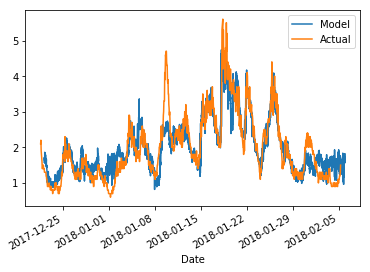

In [15]:
df1['yhat1'].plot(label='Model')
prediction_df_neashore['WVHT'].plot(label='Actual')
plt.legend()

In [66]:
for i in enumerate(range(3)):
    print(i)

(0, 0)
(1, 1)
(2, 2)


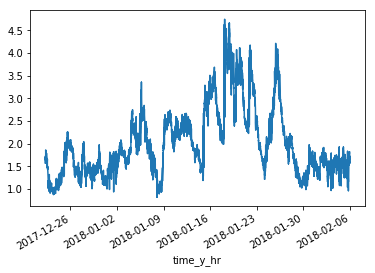

In [62]:
df1[:t1]['yhat1'].plot(label='Model')

## 24hr Observation and Predictions

In [16]:
m24 = unpickle_model('gbr_24hr.pkl')

In [17]:
yhat24 = m24.predict(X_real_time_predictions)

In [18]:
df24 = prediction_df[['time_y_hr_24']]
df24['yhat24'] = yhat24
df24['date_offshore'] = df24.index
df24.index = df24['time_y_hr_24']
df24.head()

,time_y_hr_24,yhat24,date_offshore
time_y_hr_24,,,
2018-02-06 23:00:00,2018-02-06 23:00:00,1.637867,2018-02-05 08:00:00
2018-02-06 23:00:00,2018-02-06 23:00:00,1.642520,2018-02-05 08:00:00
2018-02-06 23:00:00,2018-02-06 23:00:00,1.636074,2018-02-05 08:00:00
2018-02-06 23:00:00,2018-02-06 23:00:00,1.555023,2018-02-05 08:00:00
2018-02-06 22:00:00,2018-02-06 22:00:00,1.631694,2018-02-05 07:00:00


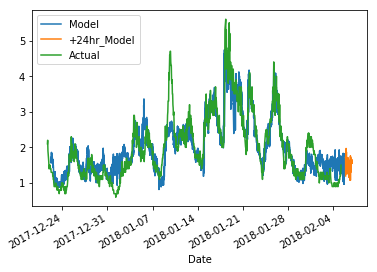

In [19]:
df1['yhat1'].plot(label='Model')
df24['2018-02-06':]['yhat24'].plot(label='+24hr_Model')
prediction_df_neashore['WVHT'].plot(label='Actual')
plt.legend()

## 48 hr prediction

In [20]:
m48 = unpickle_model('gbr_48hr.pkl')

In [21]:
yhat48 = m48.predict(X_real_time_predictions)
df48 = prediction_df[['time_y_hr_48']]
df48['yhat48'] = yhat48
df48['date_offshore'] = df48.index
df48.index = df48['time_y_hr_48']
df48.head()

,time_y_hr_48,yhat48,date_offshore
time_y_hr_48,,,
2018-02-07 23:00:00,2018-02-07 23:00:00,1.639337,2018-02-05 08:00:00
2018-02-07 23:00:00,2018-02-07 23:00:00,1.631538,2018-02-05 08:00:00
2018-02-07 23:00:00,2018-02-07 23:00:00,1.583561,2018-02-05 08:00:00
2018-02-07 23:00:00,2018-02-07 23:00:00,1.606139,2018-02-05 08:00:00
2018-02-07 22:00:00,2018-02-07 22:00:00,1.657761,2018-02-05 07:00:00


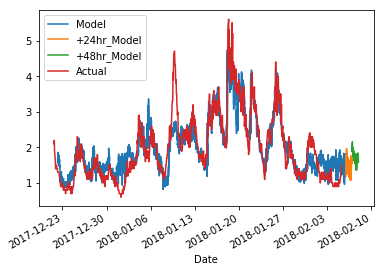

In [22]:
df1['yhat1'].plot(label='Model')
df24['2018-02-06':]['yhat24'].plot(label='+24hr_Model')
df48['2018-02-07':]['yhat48'].plot(label='+48hr_Model')
prediction_df_neashore['WVHT'].plot(label='Actual')
plt.legend()

## 72 hr Prediction

In [23]:
m72 = unpickle_model('gbr_72hr.pkl')

In [24]:
yhat72 = m72.predict(X_real_time_predictions)
df72 = prediction_df[['time_y_hr_72']]
df72['yhat72'] = yhat72
df72['date_offshore'] = df72.index
df72.index = df72['time_y_hr_72']
df72.head()

,time_y_hr_72,yhat72,date_offshore
time_y_hr_72,,,
2018-02-08 23:00:00,2018-02-08 23:00:00,1.630706,2018-02-05 08:00:00
2018-02-08 23:00:00,2018-02-08 23:00:00,1.630294,2018-02-05 08:00:00
2018-02-08 23:00:00,2018-02-08 23:00:00,1.623520,2018-02-05 08:00:00
2018-02-08 23:00:00,2018-02-08 23:00:00,1.631541,2018-02-05 08:00:00
2018-02-08 22:00:00,2018-02-08 22:00:00,1.541950,2018-02-05 07:00:00


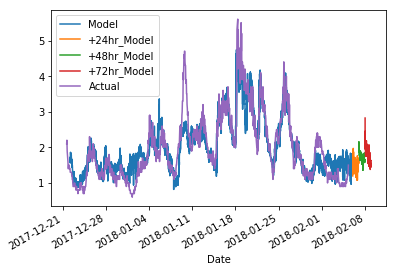

In [25]:
df1['yhat1'].plot(label='Model')
df24['2018-02-06':]['yhat24'].plot(label='+24hr_Model')
df48['2018-02-07':]['yhat48'].plot(label='+48hr_Model')
df72['2018-02-08':]['yhat72'].plot(label='+72hr_Model')
prediction_df_neashore['WVHT'].plot(label='Actual')
plt.legend()

## Predicting for 96 hrs

In [26]:
m96 = unpickle_model('gbr_96hr.pkl')
yhat96 = m96.predict(X_real_time_predictions)
df96 = prediction_df[['time_y_hr_96']]
df96['yhat96'] = yhat96
df96['date_offshore'] = df96.index
df96.index = df96['time_y_hr_96']
df96.head()

,time_y_hr_96,yhat96,date_offshore
time_y_hr_96,,,
2018-02-09 23:00:00,2018-02-09 23:00:00,1.747082,2018-02-05 08:00:00
2018-02-09 23:00:00,2018-02-09 23:00:00,1.752950,2018-02-05 08:00:00
2018-02-09 23:00:00,2018-02-09 23:00:00,1.743612,2018-02-05 08:00:00
2018-02-09 23:00:00,2018-02-09 23:00:00,1.735283,2018-02-05 08:00:00
2018-02-09 22:00:00,2018-02-09 22:00:00,1.722811,2018-02-05 07:00:00


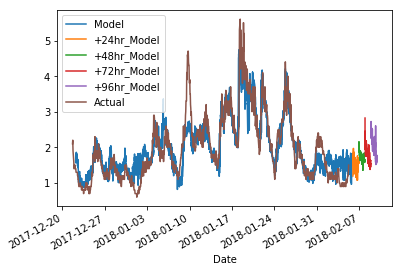

In [27]:
df1['yhat1'].plot(label='Model')
df24['2018-02-06':]['yhat24'].plot(label='+24hr_Model')
df48['2018-02-07':]['yhat48'].plot(label='+48hr_Model')
df72['2018-02-08':]['yhat72'].plot(label='+72hr_Model')
df96['2018-02-09':]['yhat96'].plot(label='+96hr_Model')
prediction_df_neashore['WVHT'].plot(label='Actual')
plt.legend()

## Predicting for 120 hrs

In [28]:
m120 = unpickle_model('gbr_120hr.pkl')
yhat120 = m120.predict(X_real_time_predictions)
df120 = prediction_df[['time_y_hr_120']]
df120['yhat120'] = yhat120
df120['date_offshore'] = df120.index
df120.index = df120['time_y_hr_120']
df120.head()

,time_y_hr_120,yhat120,date_offshore
time_y_hr_120,,,
2018-02-10 23:00:00,2018-02-10 23:00:00,1.769058,2018-02-05 08:00:00
2018-02-10 23:00:00,2018-02-10 23:00:00,1.740838,2018-02-05 08:00:00
2018-02-10 23:00:00,2018-02-10 23:00:00,1.690195,2018-02-05 08:00:00
2018-02-10 23:00:00,2018-02-10 23:00:00,1.655566,2018-02-05 08:00:00
2018-02-10 22:00:00,2018-02-10 22:00:00,1.685184,2018-02-05 07:00:00


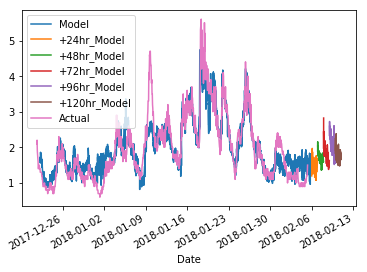

In [29]:
df1['yhat1'].plot(label='Model')
df24['2018-02-06':]['yhat24'].plot(label='+24hr_Model')
df48['2018-02-07':]['yhat48'].plot(label='+48hr_Model')
df72['2018-02-08':]['yhat72'].plot(label='+72hr_Model')
df96['2018-02-09':]['yhat96'].plot(label='+96hr_Model')
df120['2018-02-10':]['yhat120'].plot(label='+120hr_Model')
prediction_df_neashore['WVHT'].plot(label='Actual')
plt.legend()

## Predicting for 144 hrs

In [30]:
m144 = unpickle_model('gbr_144hr.pkl')
yhat144 = m144.predict(X_real_time_predictions)
df144 = prediction_df[['time_y_hr_144']]
df144['yhat144'] = yhat144
df144['date_offshore'] = df144.index
df144.index = df144['time_y_hr_144']
df144.head()

,time_y_hr_144,yhat144,date_offshore
time_y_hr_144,,,
2018-02-11 23:00:00,2018-02-11 23:00:00,1.842352,2018-02-05 08:00:00
2018-02-11 23:00:00,2018-02-11 23:00:00,1.807554,2018-02-05 08:00:00
2018-02-11 23:00:00,2018-02-11 23:00:00,1.854087,2018-02-05 08:00:00
2018-02-11 23:00:00,2018-02-11 23:00:00,1.893317,2018-02-05 08:00:00
2018-02-11 22:00:00,2018-02-11 22:00:00,1.871702,2018-02-05 07:00:00


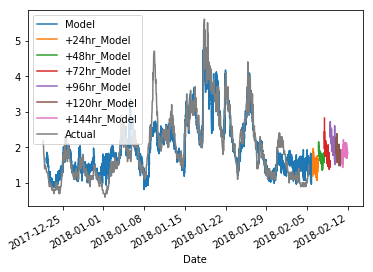

In [31]:
df1['yhat1'].plot(label='Model')
df24['2018-02-06':]['yhat24'].plot(label='+24hr_Model')
df48['2018-02-07':]['yhat48'].plot(label='+48hr_Model')
df72['2018-02-08':]['yhat72'].plot(label='+72hr_Model')
df96['2018-02-09':]['yhat96'].plot(label='+96hr_Model')
df120['2018-02-10':]['yhat120'].plot(label='+120hr_Model')
df144['2018-02-11':]['yhat144'].plot(label='+144hr_Model')
prediction_df_neashore['WVHT'].plot(label='Actual')
plt.legend()

In [32]:
df1_plot = df1[['yhat1']]

In [33]:
df24_plot = df24['2018-02-06':][['yhat24']]
df24_plot.columns = ['yhat1']

df48_plot = df48['2018-02-07':][['yhat48']]
df48_plot.columns = ['yhat1']

df72_plot = df72['2018-02-08':][['yhat72']]
df72_plot.columns = ['yhat1']

df96_plot =  df96['2018-02-09':][['yhat96']]
df96_plot.columns = ['yhat1']

df120_plot = df120['2018-02-10':][['yhat120']]
df120_plot.columns = ['yhat1']

df144_plot = df144['2018-02-11':][['yhat144']]
df144_plot.columns = ['yhat1']

In [34]:
all_pred_df = pd.concat([df1_plot, df24_plot, df48_plot, df72_plot, df96_plot, 
                         df120_plot, df144_plot], axis=0)

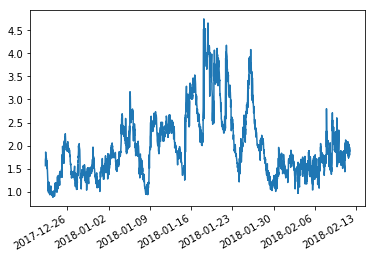

In [35]:
all_pred_df['yhat1'][0::3].plot()

In [97]:
real = pd.read_csv('predictions_7days.csv', parse_dates=['Date'], index_col='Date')
real.head()

,offshore_date,time_y_hr,time_y_hr_120,time_y_hr_144,time_y_hr_24,time_y_hr_48,time_y_hr_72,time_y_hr_96,yhat
Date,,,,,,,,,
2018-02-05 23:00:00,2018-02-05 08:00:00,2018-02-05 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.734226
2018-02-05 23:00:00,2018-02-05 08:00:00,2018-02-05 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.723391
2018-02-05 23:00:00,2018-02-05 08:00:00,2018-02-05 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.723648
2018-02-05 23:00:00,2018-02-05 08:00:00,2018-02-05 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.709032
2018-02-05 23:00:00,2018-02-05 08:00:00,2018-02-05 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.670675


In [36]:
all_pred_df = all_pred_df.resample('H').mean()

In [37]:
# adding an hour col to the df to parse it by 6am, 12pm and 6pm
all_pred_df['date_fig'] = all_pred_df.index
all_pred_df['hr_fig'] = all_pred_df['date_fig'].apply(lambda x: x.hour)
bar_yy = all_pred_df[(all_pred_df['hr_fig']==6) | (all_pred_df['hr_fig']==12) | (all_pred_df['hr_fig']==18)]

In [98]:
# interpolating to fill in the missing gaps 
bar_yy = bar_yy.interpolate(method='linear', axis=0).bfill()

In [103]:
dt = datetime.now().date() 
time_start = dt + timedelta(hours = 24)
time_end = dt + timedelta(hours = 48)

In [104]:
time_start

datetime.date(2018, 2, 6)

In [39]:
bar_yy.index.min()

Timestamp('2017-12-22 06:00:00')

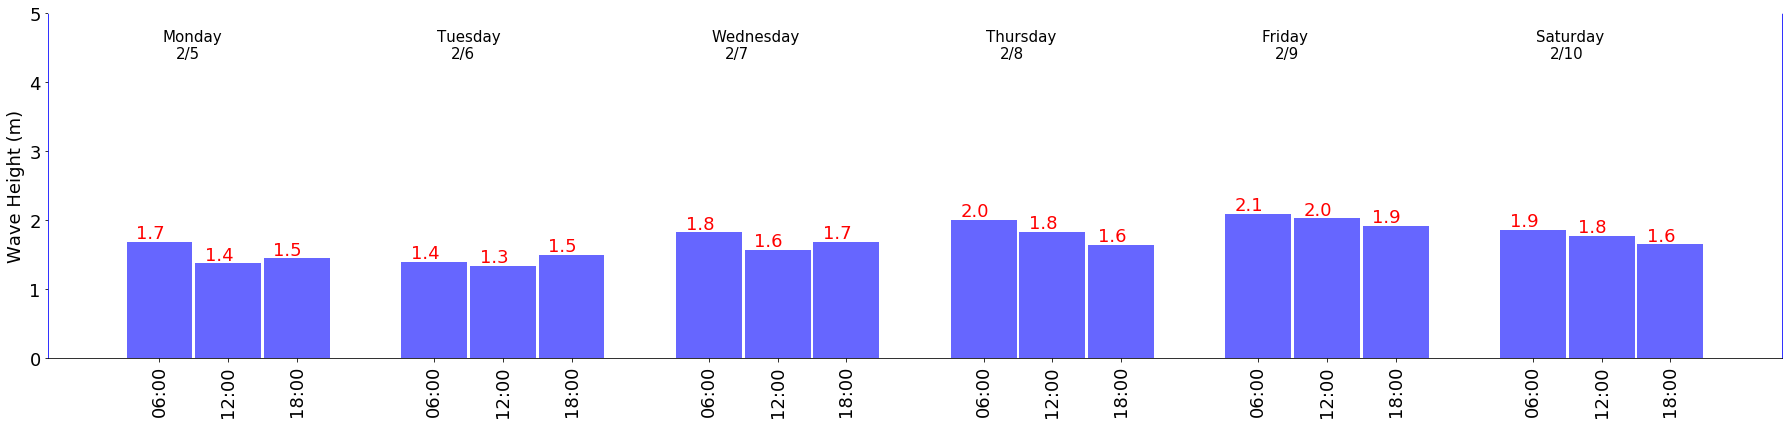

In [161]:
myFmt = mdates.DateFormatter('%H:%S')

fig, ax = plt.subplots(figsize=(25,6))
ax.bar(bar_yy['20180205':'20180210']['yhat'].index, 
       bar_yy['20180205':'20180210']['yhat'].values,
       width =0.24,
       align='center', alpha=0.6, color='b')

_= plt.xticks(bar_yy['20180205':'20180210']['yhat'].index)
_= ax.xaxis.set_major_formatter(myFmt)
_= plt.xticks(rotation=90)
_= ax.set_ylim(0,5)

# set individual bar lables using above list
for j, i in enumerate(ax.patches):
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.035, i.get_height()+.05, \
            str(round(bar_yy['20180205':'20180210']['yhat'].values[j],1)), fontsize=18,
                color='red')
    
weekday_dict={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
for j, i in enumerate(ax.patches[0::3]):
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.13, 4.6, \
            weekday_dict[bar_yy['20180205':'20180210']['yhat'][0::3].index[j].weekday()], fontsize=15,
                color='black')
    
for j, i in enumerate(ax.patches[0::3]):
    # get_x pulls left or right; get_height pushes up or down
    month = bar_yy['20180205':'20180210']['yhat'][0::3].index[j].month
    day = bar_yy['20180205':'20180210']['yhat'][0::3].index[j].day
    
    ax.text(i.get_x()+0.18, 4.35,
            str(month)+'/'+str(day), 
            fontsize=15,color='black')
    
_= ax.tick_params(axis='x', labelsize=18, color='black')
_= ax.tick_params(axis='y', labelsize=18, color= 'black')
_= ax.set_ylabel('Wave Height (m)', fontsize=18, color='black')
_= ax.tick_params(axis='x', colors='black')
_= ax.tick_params(axis='y', colors='black')
_= ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('blue')
ax.spines['left'].set_color('blue')
plt.tight_layout()
#plt.savefig('Example_Dash_Board_02052018.png')

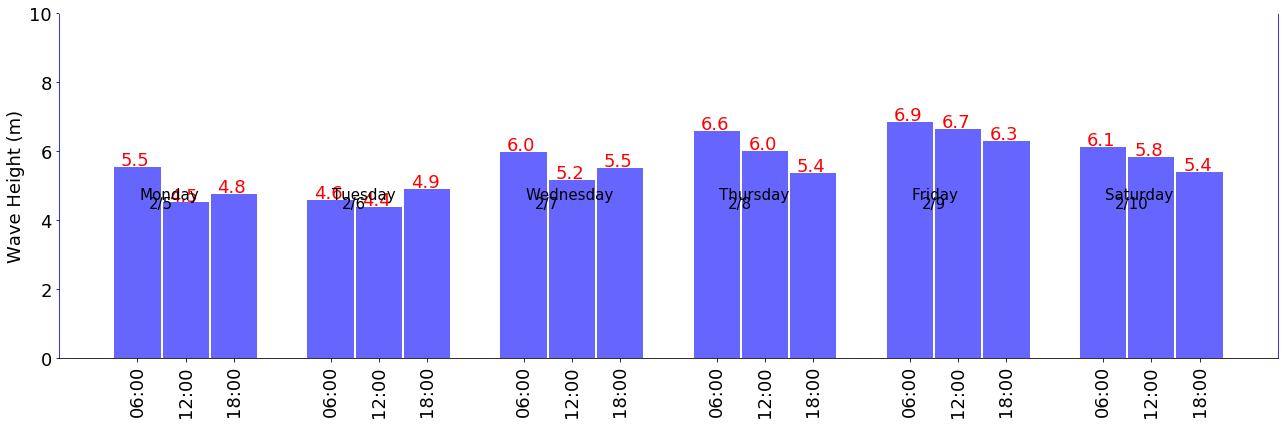

In [42]:
myFmt = mdates.DateFormatter('%H:%S')

fig, ax = plt.subplots(figsize=(18,6))
ax.bar(bar_yy['20180205':'20180210']['yhat1'].index, 
       bar_yy['20180205':'20180210']['yhat1'].values*3.28,
       width =0.24,
       align='center', alpha=0.6, color='b')

_= plt.xticks(bar_yy['20180205':'20180210']['yhat1'].index)
_= ax.xaxis.set_major_formatter(myFmt)
_= plt.xticks(rotation=90)
_= ax.set_ylim(0,10)

# set individual bar lables using above list
for j, i in enumerate(ax.patches):
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.035, i.get_height()+.05, \
            str(round(bar_yy['20180205':'20180210']['yhat1'].values[j]*3.28,1)), fontsize=18,
                color='red')
    
weekday_dict={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
for j, i in enumerate(ax.patches[0::3]):
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.13, 4.6, \
            weekday_dict[bar_yy['20180205':'20180210']['yhat1'][0::3].index[j].weekday()], fontsize=15,
                color='black')
    
for j, i in enumerate(ax.patches[0::3]):
    # get_x pulls left or right; get_height pushes up or down
    month = bar_yy['20180205':'20180210']['yhat1'][0::3].index[j].month
    day = bar_yy['20180205':'20180210']['yhat1'][0::3].index[j].day
    
    ax.text(i.get_x()+0.18, 4.35,
            str(month)+'/'+str(day), 
            fontsize=15,color='black')
    
_= ax.tick_params(axis='x', labelsize=18, color='black')
_= ax.tick_params(axis='y', labelsize=18, color= 'black')
_= ax.set_ylabel('Wave Height (m)', fontsize=18, color='black')
_= ax.tick_params(axis='x', colors='black')
_= ax.tick_params(axis='y', colors='black')
_= ax.set_facecolor('white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('blue')
ax.spines['left'].set_color('blue')
plt.tight_layout()
#plt.savefig('Example_Dash_Board_02052018.png')

In [79]:
pkl_lst = ['gbr_hr.pkl','gbr_24hr.pkl','gbr_48hr.pkl','gbr_72hr.pkl',
               'gbr_96hr.pkl','gbr_120hr.pkl', 'gbr_144hr.pkl']

datecol = ['hr', 'hr_24', 'hr_48', 'hr_72', 'hr_96', 'hr_120', 'hr_144']

date_today = datetime.now().date() # gives todays date
tdel = [0, 24, 48, 72, 96, 120, 144] # hours of predictions

df_lst_7day_pred = []
for i, model in enumerate(pkl_lst):

    print('unpickling and making predictions for {} ...'.format(datecol[i]))

    t_parse = (date_today + timedelta(tdel[i]/24)).strftime('%Y%m%d')

    date_col = 'time_y_' + datecol[i]
    gbr = unpickle_model(model)
    y_hat = gbr.predict(X_real_time_predictions)
    df = prediction_df[[date_col]]
    df['yhat'] = y_hat
    df['offshore_date'] = df.index
    df.index = df[date_col]

    if i == 0:
        df_2_app = df[:t_parse]
    else:
        df_2_app = df[t_parse:]

    df_lst_7day_pred.append(df_2_app)

unpickling and making predictions for hr ...
unpickling and making predictions for hr_24 ...
unpickling and making predictions for hr_48 ...
unpickling and making predictions for hr_72 ...
unpickling and making predictions for hr_96 ...
unpickling and making predictions for hr_120 ...
unpickling and making predictions for hr_144 ...


In [82]:
test = pd.concat(df_lst_7day_pred, axis=0)
test.index.name='date'

In [84]:
test.to_csv('CHECKING.csv')

In [91]:
aa = pd.read_csv('predictions_7days.csv', parse_dates=['Date'], index_col='Date')

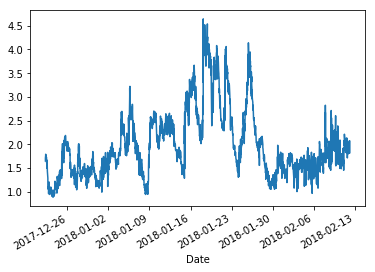

In [96]:
aa['yhat'][0::3].plot()

In [112]:
from DASH_real_time_future_predictions import *

In [113]:
all_pred_df = pd.read_csv('predictions_7days.csv', parse_dates=['Date'], index_col='Date')
all_pred_df = all_pred_df.resample('H').mean()

# adding an hour col to the df to parse it by 6am, 12pm and 6pm
all_pred_df['date_fig'] = all_pred_df.index
all_pred_df['hr_fig'] = all_pred_df['date_fig'].apply(lambda x: x.hour)
bar_yy = all_pred_df[(all_pred_df['hr_fig']==6) | (all_pred_df['hr_fig']==12) | (all_pred_df['hr_fig']==18)]
bar_yy = all_pred_df[(all_pred_df['hr_fig']==6) | (all_pred_df['hr_fig']==12) | (all_pred_df['hr_fig']==18)]

# interpolating to fill in the missing gaps
bar_yy = bar_yy.interpolate(method='linear', axis=0).bfill()

In [114]:
dt = datetime.now().date().to_datetime
time_start = dt + timedelta(hours = 24)
time_end = dt + timedelta(hours = 48)

In [118]:
myFmt = mdates.DateFormatter('%H:%S')

time_start, time_end = make_plot_times()

t1 = time_start.strftime('%Y%m%d')
t2 = time_end.strftime('%Y%m%d')
type(t2)

str

[datetime.datetime(2018, 2, 6, 6, 0) datetime.datetime(2018, 2, 6, 12, 0)
 datetime.datetime(2018, 2, 6, 18, 0) datetime.datetime(2018, 2, 7, 6, 0)
 datetime.datetime(2018, 2, 7, 12, 0) datetime.datetime(2018, 2, 7, 18, 0)]
[ 1.39902545  1.33862874  1.49686426  1.82533304  1.57374563  1.68616635]


(6,)

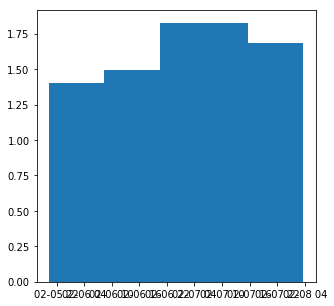

In [146]:
#fig, ax = plt.subplots(figsize=(18,6))
x = bar_yy[t1:t2].index.to_pydatetime()
y = bar_yy[t1:t2]['yhat'].values
print(x)
print(y)
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(x,y)
y.shape

In [154]:
import datetime
x[0].strftime('%m/%d/%Y')

'02/06/2018'

In [156]:
import json
dict_plot = {}
for a, b in zip(x,y):
    dict_plot[a.strftime('%m/%d/%Y')] = b
    
json.dumps(dict_plot)

'{"02/06/2018": 1.4968642609630165, "02/07/2018": 1.6861663482099716}'

In [219]:
prediction_df.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,time_y_hr_72,time_delta_96,time_y_96,time_y_hr_96,time_delta_120,time_y_120,time_y_hr_120,time_delta_144,time_y_144,time_y_hr_144
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-05 07:00:00,2018,2,5,7,0,10.0,7.0,8.0,2.00,16.000000,...,2018-02-08 22:00:00,4 days 15:12:58.561748,2018-02-09 22:12:58.561748,2018-02-09 22:00:00,5 days 15:12:58.561748,2018-02-10 22:12:58.561748,2018-02-10 22:00:00,6 days 15:12:58.561748,2018-02-11 22:12:58.561748,2018-02-11 22:00:00
2018-02-05 06:00:00,2018,2,5,6,50,10.0,6.0,8.0,2.00,16.000000,...,2018-02-08 21:00:00,4 days 15:12:58.561748,2018-02-09 21:12:58.561748,2018-02-09 21:00:00,5 days 15:12:58.561748,2018-02-10 21:12:58.561748,2018-02-10 21:00:00,6 days 15:12:58.561748,2018-02-11 21:12:58.561748,2018-02-11 21:00:00
2018-02-05 06:00:00,2018,2,5,6,40,10.0,6.0,7.0,2.00,15.833333,...,2018-02-08 21:00:00,4 days 15:12:58.561748,2018-02-09 21:12:58.561748,2018-02-09 21:00:00,5 days 15:12:58.561748,2018-02-10 21:12:58.561748,2018-02-10 21:00:00,6 days 15:12:58.561748,2018-02-11 21:12:58.561748,2018-02-11 21:00:00
2018-02-05 06:00:00,2018,2,5,6,30,360.0,6.0,8.0,1.98,15.666667,...,2018-02-08 21:00:00,4 days 15:12:58.561748,2018-02-09 21:12:58.561748,2018-02-09 21:00:00,5 days 15:12:58.561748,2018-02-10 21:12:58.561748,2018-02-10 21:00:00,6 days 15:12:58.561748,2018-02-11 21:12:58.561748,2018-02-11 21:00:00
2018-02-05 06:00:00,2018,2,5,6,20,360.0,5.0,6.0,1.96,15.500000,...,2018-02-08 21:00:00,4 days 15:12:58.561748,2018-02-09 21:12:58.561748,2018-02-09 21:00:00,5 days 15:12:58.561748,2018-02-10 21:12:58.561748,2018-02-10 21:00:00,6 days 15:12:58.561748,2018-02-11 21:12:58.561748,2018-02-11 21:00:00


In [105]:
from datetime import datetime

In [111]:

dt = datetime.now().date()
time_start = dt + timedelta(hours = 24)
time_end = dt + timedelta(hours = 48)

In [ ]:
bar_yy =  pred_data

myFmt = mdates.DateFormatter('%H:%S')

time_start, time_end = make_plot_times()

t1 = time_start.strftime('%Y%m%d')
t2 = time_end.strftime('%Y%m%d')

In [110]:
time_start

datetime.date(2018, 2, 6)

In [94]:
# get real time data from the nearshore buoy
buoyID = 
get_prediction_data(buoyID)
realtime_df_neashore = clean_prediction_data('../data/data_for_prediction_{}.csv'.format(buoyID))
print('Getting Prediction Data from {}'.format(buoyID))

Getting Prediction Data from 46026


In [118]:
test = pd.read_csv('predictions_7days.csv')

In [119]:
test.index = pd.to_datetime(test['Unnamed: 0'])

In [144]:
test_plt = test.resample('H').max()
test_plt['yhat']=test_plt['yhat']*1.5

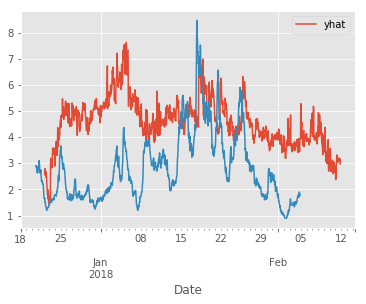

In [145]:
test_plt.plot()
aa['WVHT'].plot()

In [81]:
from get_prediction_data import *
# get real time data from the nearshore buoy
buoyID = 46026
get_prediction_data(buoyID)
realtime_df_neashore = clean_prediction_data('../data/data_for_prediction_{}.csv'.format(buoyID))
print('Getting Prediction Data from {}'.format(buoyID))

Getting Prediction Data from 46026


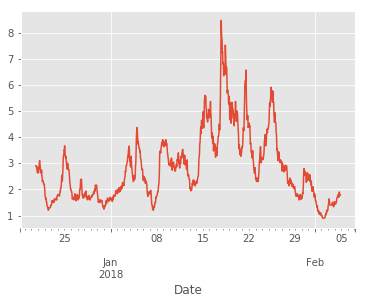

In [83]:
aa['WVHT'].plot()

In [100]:
from get_prediction_data import *
from making_7day_predictions import *
import pickle


In [122]:
m1 = unpickle_model('gbr_hr.pkl')
m2 = unpickle_model('gbr_24hr.pkl')
m3 = unpickle_model('gbr_48hr.pkl')
m4 = unpickle_model('gbr_72hr.pkl')
m5 = unpickle_model('gbr_96hr.pkl')
m6 = unpickle_model('gbr_120hr.pkl')
m7 = unpickle_model('gbr_144hr.pkl')

In [111]:
buoyID = 46059
get_prediction_data(buoyID)
prediction_df = clean_prediction_data('../data/data_for_prediction_{}.csv'.format(buoyID))
prediction_df = adding_speed_col(prediction_df, 650)
prediction_df = add_time_delta(prediction_df)
prediction_df = add_time_y(prediction_df)
prediction_df = round_time_y(prediction_df)
prediction_df.to_csv('../data/prediction_df.csv')

prediction_df['ID'] = 46059

cols_to_keep = ['YY', 'MM', 'DD', 'hh', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD',
                'APD','MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'ID', 't_arrive']

X_real_time_predictions = prediction_df[cols_to_keep].values

In [123]:
yhat1 = m1.predict(X_real_time_predictions)
yhat2 = m2.predict(X_real_time_predictions)
yhat3 = m3.predict(X_real_time_predictions)
yhat4 = m4.predict(X_real_time_predictions)
yhat5 = m5.predict(X_real_time_predictions)
yhat6 = m6.predict(X_real_time_predictions)
yhat7 = m7.predict(X_real_time_predictions)

In [133]:
plt.plot(yhat1*1.5.resample('H').mean())
plt.plot(yhat2*1.5.resample('H').mean())
plt.plot(yhat3*1.5.resample('H').mean())
plt.plot(yhat4*1.5.resample('H').mean())
plt.plot(yhat5*1.5.resample('H').mean())
plt.plot(yhat6*1.5.resample('H').mean())
plt.plot(yhat7*1.5.resample('H').mean())

AttributeError: 'float' object has no attribute 'resample'

In [102]:
from get_prediction_data import *
# get real time data from the nearshore buoy
buoyID = 46026
get_prediction_data(buoyID)
realtime_df_neashore = clean_prediction_data('../data/data_for_prediction_{}.csv'.format(buoyID))
print('Getting Prediction Data from {}'.format(buoyID))

Getting Prediction Data from 46026


In [146]:
# unpickling the model
pickle_model_name = 'gbr_2.pkl'
model = unpickle_model(pickle_model_name)

In [152]:
buoyID = 46059
get_prediction_data(buoyID)
prediction_df = clean_prediction_data('../data/data_for_prediction_{}.csv'.format(buoyID))
prediction_df = adding_speed_col(prediction_df, 650)
prediction_df = add_time_delta(prediction_df)
prediction_df = add_time_y(prediction_df)
prediction_df = round_time_y(prediction_df)
prediction_df.to_csv('../data/prediction_df.csv')

prediction_df['ID'] = 46059

cols_to_keep = ['YY', 'MM', 'DD', 'hh', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD',
                'APD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'ID', 't_arrive']

X_real_time_predictions = prediction_df[cols_to_keep].values

In [153]:
# real time predictions at nearshore from the offshore conditions at offshore buoy 46059 
y_hat_realtime = model.predict(X_real_time_predictions)

In [154]:
prediction_df.index = prediction_df['time_y_hr']

In [155]:
yy_resample = prediction_df.resample('H').mean()

In [158]:
yy_resample.tail()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,...,MWD,PRES,ATMP,WTMP,DEWP,VIS,PTDY,TIDE,t_arrive,ID
time_y_hr,,,,,,,,,,,,,,,,,,,,,
2018-02-05 16:00:00,2018.0,2.0,4.222222,16.777778,17.777778,21.111111,6.777778,8.666667,1.845185,15.592593,...,285.000000,1027.411111,12.588889,13.900000,12.588889,NaN,0.638889,NaN,18.395277,46059.0
2018-02-05 17:00:00,2018.0,2.0,4.666667,8.000000,15.000000,76.666667,5.500000,7.166667,1.763333,15.111111,...,287.800000,1027.183333,12.300000,13.900000,12.300000,NaN,-0.280556,NaN,17.646065,46059.0
2018-02-05 18:00:00,2018.0,2.0,4.785714,5.928571,30.000000,140.714286,6.214286,8.000000,1.789048,15.785714,...,282.342857,1026.878571,12.192857,13.835714,12.192857,NaN,-0.704762,NaN,17.672110,46059.0
2018-02-05 19:00:00,2018.0,2.0,5.000000,3.333333,25.000000,14.166667,6.500000,8.416667,1.958333,16.000000,...,273.430556,1026.125000,12.016667,13.800000,12.016667,NaN,-0.937500,NaN,16.123495,46059.0
2018-02-05 20:00:00,2018.0,2.0,5.000000,4.833333,16.666667,20.000000,5.333333,6.666667,1.913889,16.000000,...,268.972222,1025.850000,11.966667,13.800000,11.966667,NaN,-0.550000,NaN,15.872081,46059.0


In [157]:
yy_resample['20180101':'20180106']['y_hat'].plot()

KeyError: 'y_hat'